In [5]:
import pandas as pd
import itertools
import time
import seaborn as sns
from reactions import run_model_sm1 as run_model

In [2]:
constituents = ["H2O", "O2", "SO2", "NO2", "H2S"]
values = [i / 2 for i in range(10)]


start = time.time()
result = pd.DataFrame(
    itertools.product(values, repeat=len(constituents)), columns=constituents
)
print(f"Data generation completed in {time.time()-start} seconds")

Data generation completed in 0.057238101959228516 seconds


In [3]:
def wrap_runmodel(argument):
    concentrations = argument.to_dict()
    concentrations["NO"] = 0
    concentrations["H2SO4"] = 0
    concentrations["HNO3"] = 0
    run_model(concentrations)
    argument["H2SO4"] = concentrations["H2SO4"]
    argument["HNO3"] = concentrations["HNO3"]

    return argument

In [4]:

start = time.time()
result = result.apply(wrap_runmodel, axis=1)

print(f"Data processing completed in {time.time()- start} seconds")

Data processing completed in 76.11130499839783 seconds


In [28]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
print(glue)

Task         CoLA  MNLI  MRPC  QNLI   QQP   RTE  SST-2  STS-B
Model                                                        
BERT         60.5  86.7  89.3  92.7  72.1  70.1   94.9   87.6
BiLSTM       11.6  65.6  81.8  74.6  62.5  57.4   82.8   70.3
BiLSTM+Attn  18.6  67.6  83.9  74.3  60.1  58.4   83.0   72.8
BiLSTM+CoVe  18.5  65.4  78.7  70.8  60.6  52.7   81.9   64.4
BiLSTM+ELMo  32.1  67.2  84.7  75.5  61.1  57.4   89.3   70.3
ERNIE        75.5  92.3  93.9  97.3  75.2  92.6   97.8   93.0
RoBERTa      67.8  90.8  92.3  95.4  74.3  88.2   96.7   92.2
T5           71.6  92.2  92.8  96.9  75.1  92.8   97.5   93.1


In [6]:
result.describe()

,H2O,O2,SO2,NO2,H2S,H2SO4,HNO3
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.250000,2.250000,2.250000,2.250000,2.250000,0.874280,0.216479
std,1.436148,1.436148,1.436148,1.436148,1.436148,1.252528,0.676187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2.250000,2.250000,2.250000,2.250000,2.250000,0.000000,0.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,1.500000,0.000000
max,4.500000,4.500000,4.500000,4.500000,4.500000,6.500000,4.497942


NO2  0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0   4.5
O2                                                            
0.0  0.0  0.05  0.10  0.15  0.25  0.35  0.45  0.55  0.65  0.75
0.5  0.0  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.90  1.00
1.0  0.0  0.35  0.45  0.55  0.65  0.75  0.90  1.00  1.10  1.25
1.5  0.0  0.55  0.65  0.75  0.90  1.00  1.10  1.25  1.40  1.50
2.0  0.0  0.75  0.90  1.00  1.10  1.25  1.40  1.50  1.65  1.80
2.5  0.0  1.00  1.10  1.25  1.40  1.50  1.65  1.80  1.95  2.10
3.0  0.0  1.25  1.40  1.50  1.65  1.80  1.95  2.10  2.25  2.40
3.5  0.0  1.50  1.65  1.80  1.95  2.10  2.25  2.40  2.60  2.75
4.0  0.0  1.80  1.95  2.10  2.25  2.40  2.60  2.75  2.90  3.10
4.5  0.0  2.10  2.25  2.40  2.60  2.75  2.90  3.10  3.30  3.45


<Axes: xlabel='NO2', ylabel='O2'>

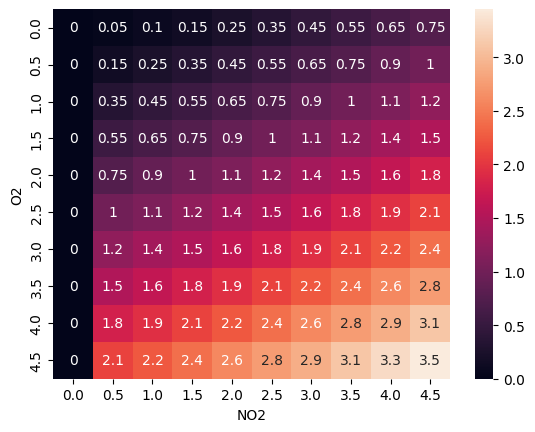

In [30]:
plot_df = result[(result["H2O"]==3) & (result["SO2"]==3)][["O2", "NO2","H2SO4"]]
plot_df = plot_df.pivot_table(index="O2", columns="NO2",values="H2SO4")
plot_df
print(plot_df)
sns.heatmap(plot_df, annot=True)